In [2]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

matplotlib.interactive(True)
plt.ion()
matplotlib.is_interactive()

True

### Obtain dataset
The dataset has been compiled from data obtained from here: https://irma.nps.gov/Stats/Reports/Park/GRCA

This shows the number of visits to the Grand Canyon National Park in each month from Jan-2011 to Dec-2017

In [3]:
grand_canyon_data = pd.read_csv('datasets/grand_canyon_visits.csv')
grand_canyon_data.head()

,Month,NumVisits
0,2011-01,139029
1,2011-02,120726
2,2011-03,304583
3,2011-04,388363
4,2011-05,419569


#### Examine the NumVisits data

In [4]:
grand_canyon_data['NumVisits'].describe()

count        84.000000
mean     426022.928571
std      193415.223338
min      120726.000000
25%      252250.500000
50%      417966.000000
75%      580652.250000
max      839086.000000
Name: NumVisits, dtype: float64

#### Divide the NumVisits value by 1000
When using the data for autocorrelation, large numbers may result in an overflow. To avoid this, we divide the NumVisits values by 1000

In [5]:
grand_canyon_data['NumVisits'] = grand_canyon_data['NumVisits']/1000
grand_canyon_data['NumVisits'].describe()

count     84.000000
mean     426.022929
std      193.415223
min      120.726000
25%      252.250500
50%      417.966000
75%      580.652250
max      839.086000
Name: NumVisits, dtype: float64

#### Plot the autocorrelation graph
We set the maxlags attribute to 20 so that the series is compared with lags ranging from -20 to +20. Notice that the autocorrelation is highest when the lag is 12 in either direction, showing the seasonality of park visits. 

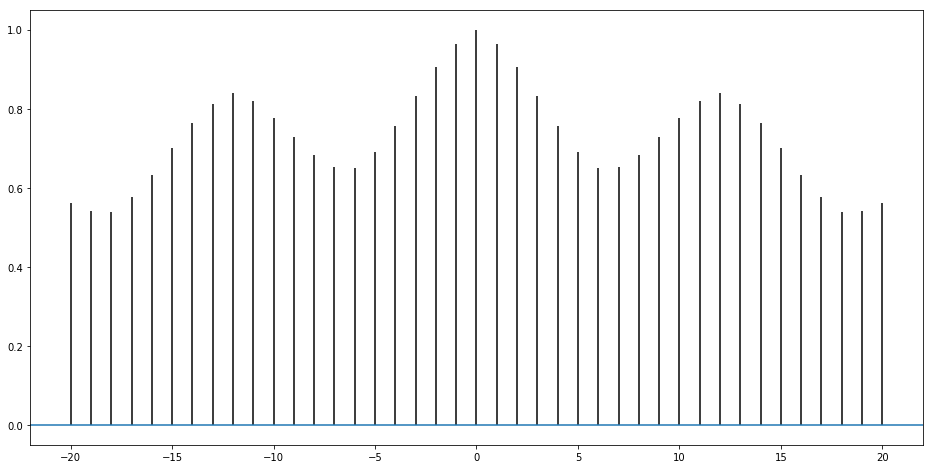

In [6]:
plt.figure(figsize=(16,8))

plt.acorr(grand_canyon_data['NumVisits'], 
          maxlags=20)

plt.show()

### Components of the Autocorrelation plot
* <b>lags:</b> List for each lag value in the autocorrelation plot. -20 to +20 in our example
* <b>c:</b> The list containing the correlation values for each of the lag values
* <b>vlines:</b> A collection of lines representing the vertical line for each lag value
* <b>hline:</b> The Line2D object representing the horizontal line at 0

lags:  [-20 -19 -18 -17 -16 -15 -14 -13 -12 -11 -10  -9  -8  -7  -6  -5  -4  -3
  -2  -1   0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15
  16  17  18  19  20] 

c:  [0.56166264 0.54072849 0.5381979  0.57639987 0.63280631 0.69975398
 0.76391559 0.81323426 0.84039608 0.8197005  0.77609889 0.72908631
 0.68254819 0.65371235 0.6512621  0.69174525 0.75661649 0.8324754
 0.90648833 0.96441788 1.         0.96441788 0.90648833 0.8324754
 0.75661649 0.69174525 0.6512621  0.65371235 0.68254819 0.72908631
 0.77609889 0.8197005  0.84039608 0.81323426 0.76391559 0.69975398
 0.63280631 0.57639987 0.5381979  0.54072849 0.56166264] 

vlines:  <matplotlib.collections.LineCollection object at 0x118f65c88> 

hline:  Line2D(NumVisits) 



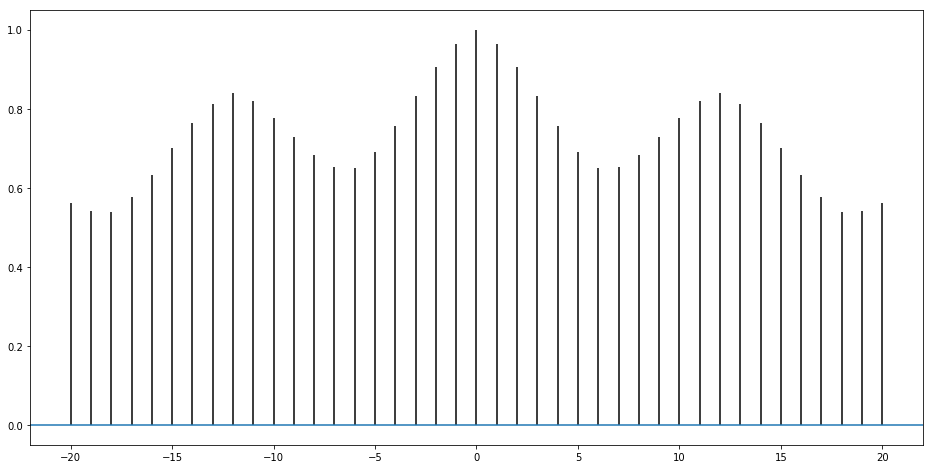

In [15]:
plt.figure(figsize=(16,8))

lags, c, vlines, hline = plt.acorr(grand_canyon_data['NumVisits'], 
                             maxlags=20)

print('lags: ', lags, '\n')
print('c: ', c, '\n')
print('vlines: ', vlines, '\n')
print('hline: ', hline, '\n')